### Random Generator Visualizer

This python script will plot the distribution from generated random numbers. 
It will connect to the shared library and generate random numbers using random function implemented inside the shared library.

In [1]:
# Imports
from mayavi import mlab
from IPython.display import HTML
import ctypes
import functools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



In [2]:
# Import functions from libft
libft = ctypes.CDLL('../lib/libft/libft.so')

gauss = libft.ft_random_gaussian_value
gauss.restype = ctypes.c_double

standard = libft.ft_random_double
standard.restype = ctypes.c_double

standard_in_range = libft.ft_random_double_in_range
standard_in_range.argtypes = [ctypes.c_double, ctypes.c_double]
standard_in_range.restype = ctypes.c_double


randfunc = lambda x,y: standard_in_range(x, y)

In [3]:
class dr:
	ARRAY_SIZE	= 2000								# Array Size
	HIST_SIZE	= 100									# Histogram Size
	bins		= np.linspace(-3, 3, HIST_SIZE)			# Bins for Histogram

	data = np.array([randfunc(-3, 3) \
		for idx in range(ARRAY_SIZE)])					# Current Distribution Record
	last = np.array([np.histogram(data, bins)[0]])	# Previous Distribution Records (array of previous distributions)

# Animate function
def animate(frame_number, bar_container):
		# Simulate new data coming in.
		dr.data = np.array([randfunc(-3, 3) for idx in range(dr.ARRAY_SIZE)])
		n, _ = np.histogram(dr.data, dr.bins)
		dr.last = np.append(dr.last, [n], axis = 0)
		for count, rect in zip(np.mean(dr.last, axis=0), bar_container.patches):
			rect.set_height(count)
		return bar_container.patches

In [48]:
def q_mult(q1, q2):
	w1, x1, y1, z1 = q1
	w2, x2, y2, z2 = q2
	w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
	x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
	y = w1 * y2 + y1 * w2 + z1 * x2 - x1 * z2
	z = w1 * z2 + z1 * w2 + x1 * y2 - y1 * x2
	return w, x, y, z

def q_conj(q):
	w, x, y, z = q
	return np.array([w, -x, -y, -z])

def q_rot(q, v):
	qv = np.array([0, *v])
	qv_rot = q_mult(q_mult(q, qv), q_conj(q))
	return qv_rot[1:]

q = np.array([0.707, 0.707, 0, 0])
v = np.array([0, 0, 2])
rotated = q_rot(q, v)
print(rotated)

(0.0, -1.9993959999999997, 0.0)


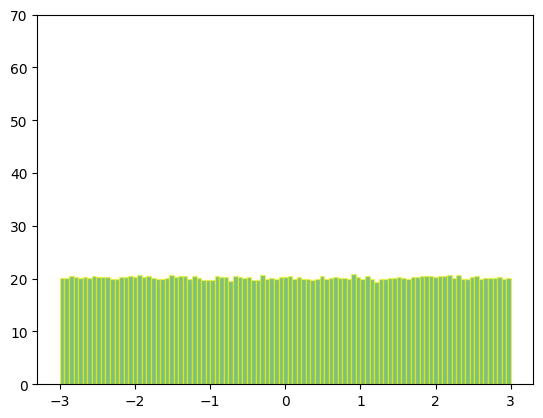

In [4]:
# Plot animation
fig, ax = plt.subplots();
_, _, bar_container = ax.hist(dr.data, dr.bins, lw=1,
						ec="yellow", fc="green", alpha=0.5);
ax.set_ylim(top=70)  # set safe limit to ensure that all data is visible.
anim = functools.partial(animate, bar_container=bar_container);

ani = animation.FuncAnimation(fig, anim, 200, repeat=False, blit=True);

HTML(ani.to_jshtml())

In [9]:
# Create a sphere
r = 1.0
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0:pi:101j, 0:2 * pi:101j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

# Some lambdas
normalize = lambda x: x / np.linalg.norm(x)
invert = lambda x, n: x * -1 if np.dot(x, n) < 0 else x

# Number of Points
N = 10000

# Surface normal
n = normalize(np.array([0, 1, 0]))


mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(800, 800))
mlab.clf()

vectors = np.array([[randfunc(-1, 1), randfunc(-1, 1), randfunc(-1, 1)] for idx in range(N)])

units = np.array([normalize(x) for x in vectors])
inverted = np.array([invert(x, n) for x in units])

o = inverted

mlab.mesh(x , y , z, color=(0.0,0.5,0.5))
mlab.points3d(o[:,0], o[:,1], o[:,2], scale_factor=0.01, color=(1,0,0))


mlab.show()
